# Crawl Stats Plots (Scrapy)

This notebook loads the crawler CSV log and produces plots

## What you’ll get
- Pages crawled vs time
- URLs encountered (unique) vs time
- URLs able to crawl (unique, passes your rules) vs time
- Keywords extracted vs time
- Crawl speed (pages/min) vs time


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path to CSV
CSV_PATH = 'crawl_log.csv'

df = pd.read_csv(CSV_PATH)
df.head()

,page_number,elapsed_seconds,elapsed_minutes,total_urls_extracted,total_keywords_extracted,page_urls,page_keywords,urls_able_to_crawl,urls_crawled,urls_remaining,encountered_urls_total,encountered_urls_unique,able_urls_unique,crawled_urls_unique
0,1,2.12,0.0353,155,10,155,10,133,1,132,155,133,132,1
1,2,2.85,0.0475,330,20,175,10,154,2,152,330,154,153,2
2,3,3.20,0.0534,509,30,179,10,218,3,215,509,218,215,3
3,4,3.54,0.0590,657,40,148,10,224,4,220,657,224,221,4
4,5,4.21,0.0702,826,50,169,10,245,5,240,826,245,242,5


In [20]:
cols = [
    "page_number",
    "elapsed_seconds",
    "elapsed_minutes",
    "total_urls_extracted",
    "total_keywords_extracted",
    "page_urls",
    "page_keywords",
    "urls_able_to_crawl",
    "urls_crawled",
    "urls_remaining",
    "encountered_urls_total",
    "encountered_urls_unique",
    "able_urls_unique",
    "crawled_urls_unique",
]

missing = [c for c in cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}\nFound: {list(df.columns)}")

for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Max minutes:", df["elapsed_minutes"].max())
print("Max pages:", df["page_number"].max())


Max minutes: 10.9191
Max pages: 1241


In [21]:
def plot_xy(x, y, title, ylabel):
    plt.figure()
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Elapsed Minutes")
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

x = df['elapsed_minutes']

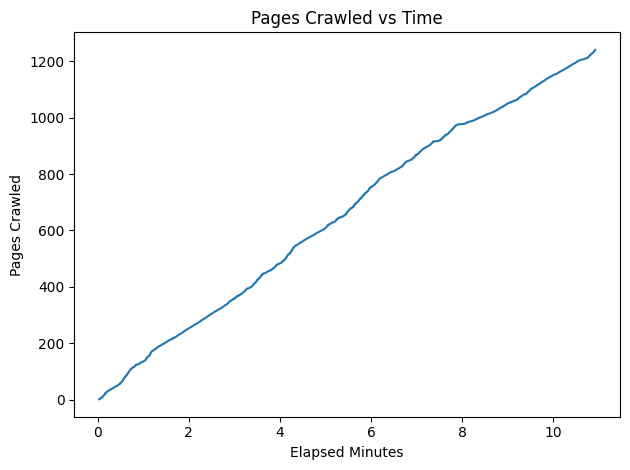

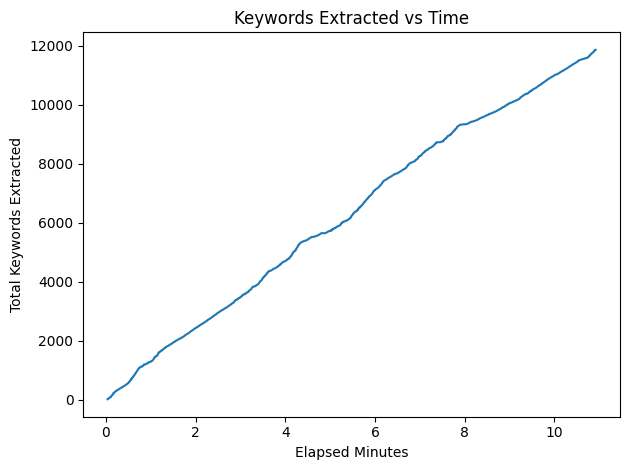

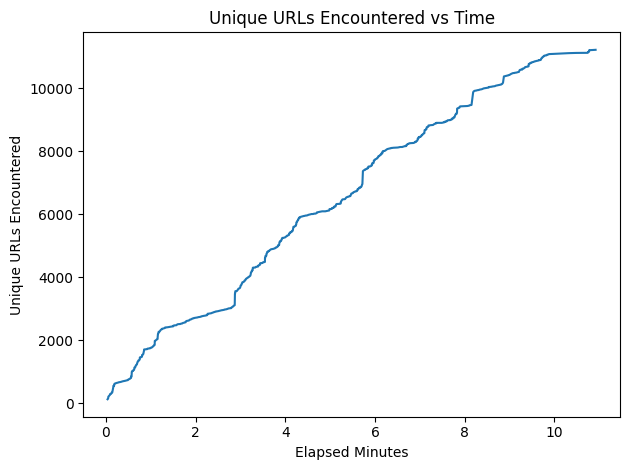

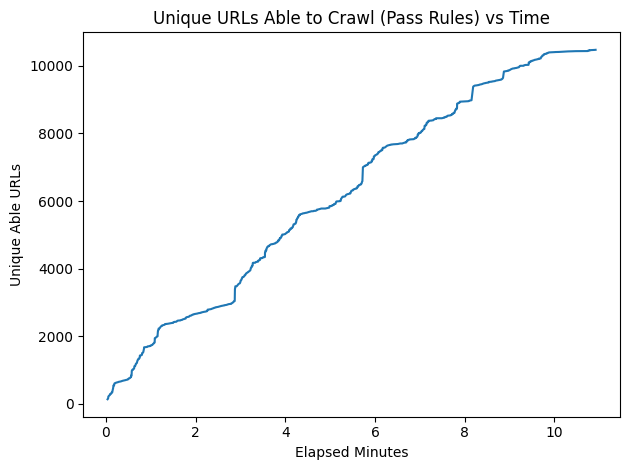

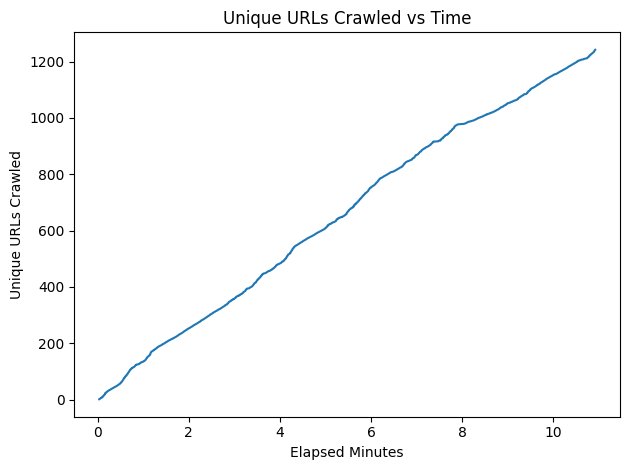

In [22]:
plot_xy(x, df["page_number"], "Pages Crawled vs Time", "Pages Crawled")

plot_xy(x, df["total_keywords_extracted"], "Keywords Extracted vs Time", "Total Keywords Extracted")

plot_xy(x, df["encountered_urls_unique"], "Unique URLs Encountered vs Time", "Unique URLs Encountered")

plot_xy(x, df["able_urls_unique"], "Unique URLs Able to Crawl (Pass Rules) vs Time", "Unique Able URLs")

plot_xy(x, df["crawled_urls_unique"], "Unique URLs Crawled vs Time", "Unique URLs Crawled")

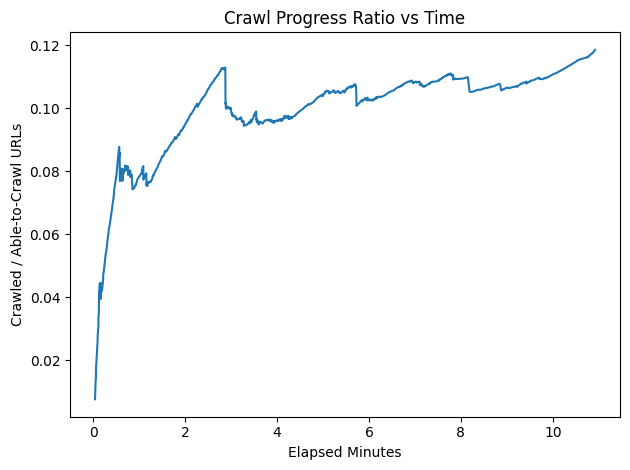

In [23]:
df["crawl_progress_ratio"] = (df["crawled_urls_unique"] / df["able_urls_unique"])
plot_xy(x, df["crawl_progress_ratio"], "Crawl Progress Ratio vs Time", "Crawled / Able-to-Crawl URLs")

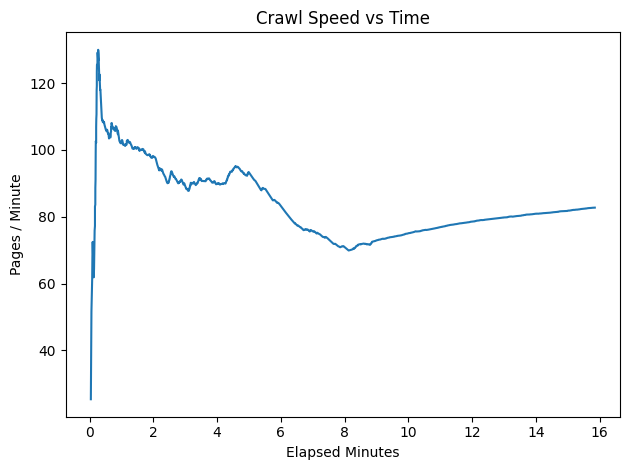

In [14]:
df["pages_per_min"] = df["page_number"] / df["elapsed_minutes"]
plot_xy(df["elapsed_minutes"], df["pages_per_min"], "Crawl Speed vs Time", "Pages / Minute")


In [24]:
# use final average speed
final_pages = df["page_number"].iloc[-1]
final_minutes = df["elapsed_minutes"].iloc[-1]

avg_ppm = final_pages / final_minutes
print(f"Average crawl speed: {avg_ppm:.2f} pages/min")

# this just helps us actually understand an amount of time
# i.e. 120960 minutes vs 84 days
def minutes_conversion(m):
    m = float(m)
    hours = m / 60
    days = hours / 24
    years = days / 365
    if years >= 1:
        return f"{years:.2f} years"
    if days >= 1:
        return f"{days:.2f} days"
    if hours >= 1:
        return f"{hours:.2f} hours"
    return f"{m:.2f} minutes"

print("Using average speed:", round(avg_ppm, 2), "pages/min")

for N in [10_000_000, 1_000_000_000]:
    est_minutes = N / avg_ppm
    print(f"Estimated time for {N:,} pages: {minutes_conversion(est_minutes)}")


Average crawl speed: 113.65 pages/min
Using average speed: 113.65 pages/min
Estimated time for 10,000,000 pages: 61.10 days
Estimated time for 1,000,000,000 pages: 16.74 years
